## Sample Image Pictures

Found 2152 files belonging to 3 classes.
Classes found: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


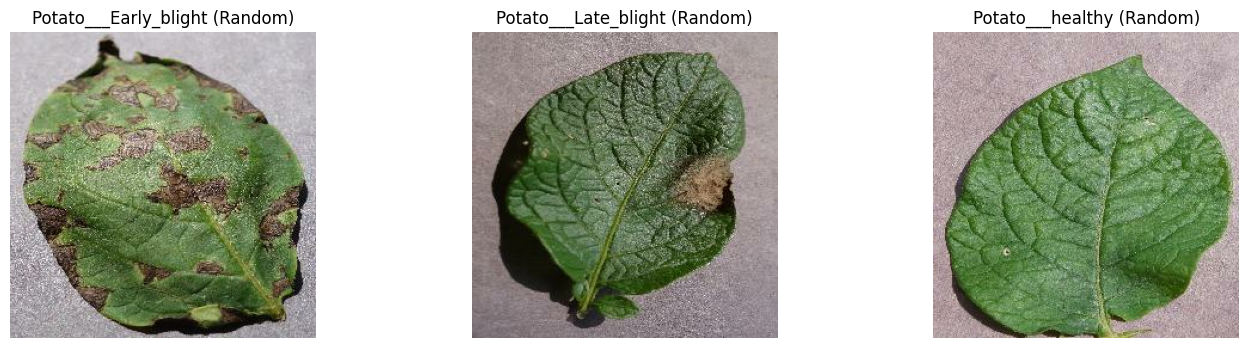


Saved: c:\Users\ACER\Desktop\Projects\Potato Leaf Disease Classification using Deep Learning Custom CNN Mini Project\sample_data_random.png


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import random


# CORRECT DATASET PATH
DATASET_DIR = r"C:\Users\ACER\Desktop\Projects\Potato Leaf Disease Classification using Deep Learning Custom CNN Mini Project\PlantVillage"

IMAGE_SIZE = 256
BATCH_SIZE = 32

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    seed=None,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Classes found:", class_names)


# FUNCTION: collect multiple images per class
def collect_images(dataset, class_names, max_per_class=50):
    collected = {cls: [] for cls in class_names}

    for images, labels in dataset.unbatch():
        label = int(labels.numpy())
        class_name = class_names[label]

        # store up to max_per_class images per class
        if len(collected[class_name]) < max_per_class:
            collected[class_name].append(images.numpy())

        # stop when full
        if all(len(v) >= max_per_class for v in collected.values()):
            break

    return collected

# collect images
collected_images = collect_images(dataset, class_names)


# RANDOM SAMPLE FOR DISPLAY
samples = {cls: random.choice(collected_images[cls]) for cls in class_names}


# PLOT + SAVE IMAGE GRID
plt.figure(figsize=(14, 10))

for idx, cls in enumerate(class_names):
    plt.subplot(3, 3, idx + 1)
    plt.imshow(samples[cls].astype("uint8"))
    plt.title(f"{cls} (Random)")
    plt.axis("off")

plt.tight_layout()

save_path = "sample_data_random.png"
plt.savefig(save_path, dpi=300)
plt.show()

print(f"\nSaved: {os.path.abspath(save_path)}")
